In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd

In [2]:
ELECTION_CSV = "C:/Users/ttibb/OneDrive/Desktop/geog594/gerrySD/CA24_srprec.zip"  
PRECINCT_SHAPE   = "C:/Users/ttibb/OneDrive/Desktop/geog594/gerrySD/srprec_state_g24_v01_shp.zip"

In [3]:
##p50CD_GEOJSON     = "C:/Users/ttibb/OneDrive/Desktop/geog594/gerrySD/CA-congress-commission.geojson"
##currentCD = "C:/Users/ttibb/OneDrive/Desktop/geog594/gerrySD/CA-Cong25.geojson"

In [4]:
eleR = gpd.read_file(ELECTION_CSV)

In [5]:
prec = gpd.read_file(PRECINCT_SHAPE)

C:\Users\ttibb\miniforge3\envs\research\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: /vsizip/C:/Users/ttibb/OneDrive/Desktop/geog594/gerrySD/srprec_state_g24_v01_shp.zip/srprec_state_g24_v01_shp.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


In [7]:
eleR.head()

,COUNTY,FIPS,SRPREC,ELECTION,SRPREC_KEY,GEO_TYPE,ADDIST,CDDIST,SDDIST,BEDIST,...,PR_6_N,PR_6_Y,SENDEM01,SENDEM02,SENREP01,SENREP02,USPDEM01,USPREP01,USSDEM01,USSREP01
0,1,06001,200100,g24,06001200100,srprec,14,12,7,2,...,682,2101,1826,912,0,0,2633,208,2660,210
1,1,06001,200200,g24,06001200200,srprec,14,12,7,2,...,466,1454,1203,630,0,0,1771,145,1800,138
2,1,06001,201400,g24,06001201400,srprec,14,12,7,2,...,589,2225,1714,1013,0,0,2661,185,2700,184
3,1,06001,202200,g24,06001202200,srprec,14,12,7,2,...,70,319,190,167,0,0,352,34,355,35
4,1,06001,202500,g24,06001202500,srprec,14,12,7,2,...,143,466,239,295,0,0,525,85,537,80


In [8]:
eleR = eleR[["SRPREC_KEY","COUNTY", "USPREP01", "USPDEM01"]].copy()

In [9]:
print("Duplicate SRPREC_KEYs in eleR after grouping:")
print(f"Unique keys: {eleR['SRPREC_KEY'].nunique()}")
print(f"Total rows: {len(eleR)}")

Duplicate SRPREC_KEYs in eleR after grouping:
Unique keys: 25167
Total rows: 25167


In [10]:
print(f"\nMissing SRPREC_KEY in prec: {prec['SRPREC_KEY'].isna().sum()}")



Missing SRPREC_KEY in prec: 21


In [11]:
common_keys = set(prec['SRPREC_KEY'].dropna()) & set(eleR['SRPREC_KEY'])
print(f"\nKeys in both datasets: {len(common_keys)}")
print(f"Keys only in prec: {len(set(prec['SRPREC_KEY'].dropna()) - set(eleR['SRPREC_KEY']))}")
print(f"Keys only in eleR: {len(set(eleR['SRPREC_KEY']) - set(prec['SRPREC_KEY'].dropna()))}")


Keys in both datasets: 24124
Keys only in prec: 0
Keys only in eleR: 1043


In [12]:
merger = prec.merge(eleR, on='SRPREC_KEY', how='left')

# Check the result
print(f"Total precincts with geometry: {len(merger)}")
print(f"Precincts with vote data: {merger['USPDEM01'].notna().sum()}")
print(f"Missing vote data: {merger['USPDEM01'].isna().sum()}")

Total precincts with geometry: 24145
Precincts with vote data: 24124
Missing vote data: 21


In [13]:
merger = merger.dropna(subset=['USPDEM01', 'USPREP01'])

In [14]:
merger['USPDEM01'] = pd.to_numeric(merger['USPDEM01'], errors='coerce')
merger['USPREP01'] = pd.to_numeric(merger['USPREP01'], errors='coerce') 

In [15]:
merger.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 24124 entries, 0 to 24144
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SRPREC      24124 non-null  object  
 1   COUNTY_x    24124 non-null  object  
 2   ELECTION    24124 non-null  object  
 3   PREC_TYPE   24124 non-null  object  
 4   FIPS_CODE   24124 non-null  object  
 5   SRPREC_KEY  24124 non-null  object  
 6   geometry    24124 non-null  geometry
 7   COUNTY_y    24124 non-null  object  
 8   USPREP01    22270 non-null  float64 
 9   USPDEM01    22270 non-null  float64 
dtypes: float64(2), geometry(1), object(7)
memory usage: 2.0+ MB


In [17]:
SD = merger[merger.FIPS_CODE.isin(['06073'])].reset_index()

In [18]:
SD.head()

,index,SRPREC,COUNTY_x,ELECTION,PREC_TYPE,FIPS_CODE,SRPREC_KEY,geometry,COUNTY_y,USPREP01,USPDEM01,pdem
0,16572,181200,073,g24,SRPREC,06073,06073181200,"POLYGON ((-117.06416 32.79388, -117.06413 32.7...",37,503.0,716.0,0.5
1,16573,505710,073,g24,SRPREC,06073,06073505710,"POLYGON ((-117.01473 32.72809, -117.01469 32.7...",37,346.0,450.0,0.5
2,16574,428610,073,g24,SRPREC,06073,06073428610,"MULTIPOLYGON (((-117.2141 33.17722, -117.21405...",37,354.0,243.0,0.5
3,16575,428611,073,g24,SRPREC,06073,06073428611,"MULTIPOLYGON (((-117.21068 33.19338, -117.2106...",37,272.0,199.0,0.5
4,16576,125270,073,g24,SRPREC,06073,06073125270,"POLYGON ((-117.26545 32.84337, -117.26545 32.8...",37,408.0,639.0,0.5


<Axes: >

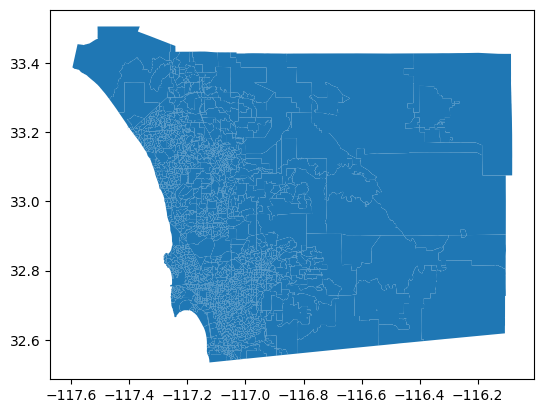

In [20]:
SD.plot()

In [21]:
SD.to_file("CA24srprecPresVote.geojson")
